# Modélisation Prédictive de la Dépression en Utilisant le SVM 

## importation de donne 

In [2]:
import pandas as pd 


In [3]:
data =pd.read_csv(r"C:\Users\dell\OneDrive\Documents\depsrission student\ANALYST DEPRESSION STUDENT\data\Student Depression Dataset.csv")
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


## Affichier les nom de colone 


In [4]:
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Affichier LE TYPDE DE COLONE 

In [5]:

data['Depression'].dtype

dtype('int64')

## affichier le premiere 5 donnes 

In [6]:
data['Depression'].head()

0    1
1    0
2    0
3    1
4    0
Name: Depression, dtype: int64

## Conversion des valeurs catégorielles en valeurs numériques

In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Have you ever had suicidal thoughts ?'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Depression'] = data['Depression'].astype(int)

In [8]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,1,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,26,0,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,30,1,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,32,1,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,1,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,1,7.0,1.0,1,0
27897,140686,0,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,0,0.0,3.0,1,0
27898,140689,0,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,0,12.0,2.0,0,0
27899,140690,1,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,1,10.0,5.0,0,1


## afficher les categores de colone 


In [9]:
data["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

## Nous allons convertir les valeurs de la colonne "Sleep Duration" en valeurs numériques pour rendre les données compatibles avec le modèle de machine learning.

In [10]:
sleep_duration_map = {
    'Less than 5 hours': 4,
    '5-6 hours': 5,
    '7-8 hours': 7,
    'More than 8 hours': 8,
    'Others': 0  
}
data['Sleep Duration'] = data['Sleep Duration'].map(sleep_duration_map)

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Appliquer la correspondance à la colonne "Sleep Duration"
data['Profession'] = label_encoder.fit_transform(data['Profession'])


## Appliquer l'encodeur à la colonne "Dietary Habits"

In [12]:
diet_encoder = LabelEncoder()
data['Dietary Habits'] = diet_encoder.fit_transform(data['Dietary Habits'])

## Appliquer l'encodeur à la colonne "Degree"

In [13]:
degree_encoder = LabelEncoder()
data['Degree'] = degree_encoder.fit_transform(data['Degree'])

In [14]:
data

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0,33.0,Visakhapatnam,11,5.0,0.0,8.97,2.0,0.0,5,0,3,1,3.0,1.0,0,1
1,8,1,24.0,Bangalore,11,2.0,0.0,5.90,5.0,0.0,5,1,10,0,3.0,2.0,1,0
2,26,0,31.0,Srinagar,11,3.0,0.0,7.03,5.0,0.0,4,0,5,0,9.0,1.0,1,0
3,30,1,28.0,Varanasi,11,3.0,0.0,5.59,2.0,0.0,7,1,7,1,4.0,5.0,1,1
4,32,1,25.0,Jaipur,11,4.0,0.0,8.13,3.0,0.0,5,1,17,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,1,27.0,Surat,11,5.0,0.0,5.75,5.0,0.0,5,3,11,1,7.0,1.0,1,0
27897,140686,0,27.0,Ludhiana,11,2.0,0.0,9.40,3.0,0.0,4,0,25,0,0.0,3.0,1,0
27898,140689,0,31.0,Faridabad,11,3.0,0.0,6.61,4.0,0.0,5,3,22,0,12.0,2.0,0,0
27899,140690,1,18.0,Ludhiana,11,5.0,0.0,6.88,2.0,0.0,4,0,11,1,10.0,5.0,0,1



'Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist']

## Séparer les données en variables d'entrée (X) et variable cible (y)

In [15]:
X = data.drop(columns=['id', 'City', 'Degree', 'Depression'])
y = data['Depression']

## Nous importons les bibliothèques nécessaires pour diviser les données en ensembles d'entraînement et de test, entraîner un modèle SVM, et évaluer sa performance avec des métriques comme l'exactitude et le rapport de classification.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

## Traitement des valeurs manquantes et encodage des variables catégorielles


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
le = LabelEncoder()



## Division des données et prétraitement

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Traitement des valeurs manquantes

In [19]:
X_train['Sleep Duration'] = le.fit_transform(X_train['Sleep Duration'])
X_train = imputer.fit_transform(X_train)

## creation de modele et l'entrainement

In [20]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

## Prédiction avec le modèle SVM

In [21]:

y_pred = svm_model.predict(X_test)
print(y_pred)


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[0 0 0 ... 1 0 1]


In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Calculer la matrice de confusion

In [23]:

cm = confusion_matrix(y_test, y_pred)

cm

array([[2013,  330],
       [ 641, 2597]], dtype=int64)

## Afficher la matrice de confusion


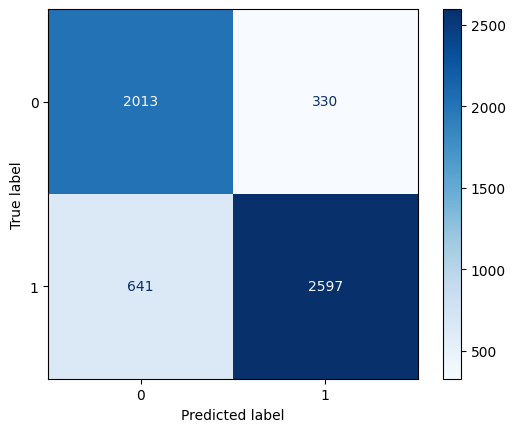

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Calcul de la précision

In [25]:
accuracy_score(y_test, y_pred)

0.8260168428597026